##### 샘플 데이터

In [6]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [7]:
dataframes = []

for i in range(0, 6) :
    with open(f"./data/한글 크롤러 파일/cluster{i}.pkl", 'rb') as file :
        load_df = pickle.load(file)
    dataframes.append(load_df)
df = pd.concat(dataframes, ignore_index = True)
df

,Review,tagged_review,vector,cluster,action_cluster
0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ...","[-0.010056162, 0.011940317, -0.002362994, -0.0...",0,4
1,에어컨이랑 겨우겨우 연결됐는데 제품이 존재하지않는다고 다시 연결하라는 메세지 떠서 ...,"[에어컨, 연결, 돼다, 제품, 존재, 않다, 다시, 연결하다, 메세지, 뜨다, 다...","[0.011419552, 0.0006861823, 0.0017646593, 0.00...",0,4
2,세탁기건조기 사용중인데 전원 on기능이없어서 딱히 쓸모가없네요 off가 자동으로 되...,"[세탁기, 건조기, 사용, 전원, 기능, 없다, 딱하다, 쓸모, 없다, 가다, 자동...","[0.0067329947, -0.014764008, -0.006465463, -0....",0,3
3,연결도 안되고 제품 네트워크변경도 안되고 앱 업데이트 하더니 이따위로 만들어놨네요....,"[연결, 안되다, 제품, 네트워크, 변경, 안되다, 앱, 업데이트, 만들다, 네트워...","[0.005090597, 0.017557316, 0.007888111, -0.001...",0,5
4,갑자기 로그인하라더니 등록되있던 LG가구들 삭제되고 와이파이 연결도 안됨. 아니 잘...,"[갑자기, 로그인, 더니, 등록, 가구, 삭제, 와이파이, 연결, 안되다, 아니다,...","[0.013620271, -0.00032199163, 0.017426351, 0.0...",0,2
...,...,...,...,...,...
3521,쓸만하네요! 나름 괜찮은 앱 나온듯!,"[쓸다, 나름, 괜찮다, 앱, 나오다]","[-0.01626999, 0.011632578, -0.004794219, -0.01...",5,2
3522,필요할때 적절하게 유용한 메시지를 날려주네요,"[필요하다, 적절하다, 유용하다, 메시지, 날다]","[-0.010545639, 0.0080818245, 0.0021254001, -0....",5,0
3523,디자인 너무 이뻐요. 단순해서 더 좋구요,"[디자인, 이쁘다, 단순하다, 더, 좋다]","[-0.02457327, 0.022735238, -0.013635086, -0.03...",5,0
3524,어떻게 하라는거예요? 설정하는데 종일 씨름하다 삭제...,"[하라, 거, 설정, 종일, 씨름, 삭제]","[-0.0117682805, 0.016289528, -0.00037949672, -...",5,0


# ◆ 1. Satisfaction
* 1.1 감성사전 불러오기 (SentiWord_info.json)
* 1.2 감성점수 구하는 define 함수 만들기
* 1.3 감성점수 구하기
* 1.4 액션 별로 감성점수 계산해서 df에 추가하기

### 1.1 감성사전 불러오기

In [8]:
import json

In [9]:
with open('./data/SentiWord_info.json', encoding = 'utf-8-sig', mode = 'r') as f :
    sent_dicts = json.load(f)
sent_dicts

[{'word': '(-;', 'word_root': '(', 'polarity': '1'},
 {'word': '(;_;)', 'word_root': '(;_;)', 'polarity': '-1'},
 {'word': '(^^)', 'word_root': '(^^)', 'polarity': '1'},
 {'word': '(^-^)', 'word_root': '(^-^)', 'polarity': '1'},
 {'word': '(^^*', 'word_root': '(', 'polarity': '1'},
 {'word': '(^_^)', 'word_root': '(^_^)', 'polarity': '1'},
 {'word': '(^_^;', 'word_root': '(', 'polarity': '-1'},
 {'word': '(^o^)', 'word_root': '(^o^)', 'polarity': '1'},
 {'word': '(-_-)', 'word_root': '(-_-)', 'polarity': '-1'},
 {'word': '(T_T)', 'word_root': '(T_T)', 'polarity': '-1'},
 {'word': '(ㅡㅡ)', 'word_root': '(', 'polarity': '-1'},
 {'word': ')-:', 'word_root': ')', 'polarity': '-1'},
 {'word': '*^^*', 'word_root': '*', 'polarity': '1'},
 {'word': '/^o^\\', 'word_root': '/', 'polarity': '1'},
 {'word': ':(', 'word_root': ':', 'polarity': '1'},
 {'word': ":'-(", 'word_root': ':', 'polarity': '1'},
 {'word': ':-(', 'word_root': ':', 'polarity': '1'},
 {'word': ':)', 'word_root': ':', 'polarity':

### 1.2 감성점수 구하는 define 함수 만들기

In [17]:
def sentiment_score(sent_dicts, token_list) :
    result_list = []

    for token in token_list :
        for dict in sent_dicts :
            if token == dict['word'] :
                result = dict['polarity'], dict['word']
                result_list.append(result)

    return (result_list)

In [18]:
sentiment_score(sent_dicts, df['tagged_review'].iloc[0])

[('-2', '번거롭다'), ('-1', '까다롭다'), ('1', '크다'), ('-1', '억지로')]

In [19]:
# csv로 저장해서 단어 하나하나씩 나눠져서 나오는 문제 해결 방법 (감성분석 제대로 된다면 할 필요 없음)
df['tagged_review'] = df['tagged_review'].apply(lambda x : str(x))

In [20]:
df['tagged_review'] = df['tagged_review'].apply(eval)

### 1.3  감성점수 구하기

#### 1.3.1 적합하게 형태소 재분리

In [ ]:
# !pip install konlpy

In [21]:
from konlpy.tag import Okt
okt=Okt()

In [22]:
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem = True, norm = True)

    tagged_list = []
    for word, tag in pos_words :
        if tag in ['Noun', 'Adjective', 'Verb', 'VerbPrefix'] : # VerbPrefix : 부정적인 단어
                tagged_list.append(word)
    return tagged_list


#### 1.3.2 감정점수 적용하기

In [24]:
sentiment = []
for i in tqdm(df['Review']) :
    token = okt_pos_tagging(i)
    score = sentiment_score(sent_dicts, token)
    sentiment.append(score)
sentiment

100%|██████████| 3526/3526 [00:39<00:00, 88.81it/s] 


[[('-2', '번거롭다'), ('-1', '까다롭다'), ('1', '크다'), ('-1', '억지로')],
 [('-1', '걸리다'), ('1', '빠르다'), ('-1', '없다')],
 [('-1', '없다'),
  ('-2', '딱하다'),
  ('-1', '없다'),
  ('-2', '버리다'),
  ('-1', '아쉽다'),
  ('-2', '딱하다'),
  ('-1', '없다')],
 [('-1', '없다')],
 [('-2', '아니다')],
 [('2', '편리하다'), ('-1', '아쉽다'), ('-1', '아쉽다')],
 [('-2', '지겹다'), ('2', '좋다')],
 [('1', '잘'), ('-1', '없다')],
 [('-1', '없다')],
 [('-1', '없다')],
 [('-2', '불편하다')],
 [('-1', '없다')],
 [('1', '고치다'), ('-1', '없다')],
 [('2', '편하다')],
 [('1', '잘'), ('1', '빠르다')],
 [('-1', '없다')],
 [('2', '유용하다'), ('-1', '없다')],
 [('-2', '버리다'), ('-1', '없다')],
 [('2', '좋다'), ('2', '좋다')],
 [('-2', '아니다')],
 [('1', '안정'), ('2', '개선'), ('-2', '나빠지다'), ('-1', '없다')],
 [('-2', '오류'), ('0', '못')],
 [('0', '못'), ('1', '빠르다'), ('2', '개선')],
 [],
 [('-1', '없다'), ('-1', '느리다'), ('1', '잘')],
 [('2', '최고'), ('2', '편하다'), ('1', '용하다'), ('2', '편하다')],
 [('-2', '오류')],
 [('2', '좋다')],
 [('2', '좋다')],
 [('1', '빠르다'), ('2', '좋다')],
 [('1', '잘'), ('1', '확실하다'), ('-1', '느리다

In [26]:
# 감성점수 평균 구하기
sentiment_score = []
for sent in tqdm(sentiment) :
    score = []
    for s in sent :
        score.append(int(s[0]))

    if len(score) == 0 :
        sentiment_score.append(0)
    else :
        sentiment_score.append(np.mean(score))
    
df['sentiment_score'] = sentiment_score
df

  0%|          | 0/3526 [00:00<?, ?it/s]

100%|██████████| 3526/3526 [00:00<00:00, 103202.44it/s]


,Review,tagged_review,vector,cluster,action_cluster,sentiment_score
0,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,"[세탁기, 연결하다, 정도, 세상, 쓰레기, 연결, 번거롭다, 사용성, 까다롭다, ...","[-0.010056162, 0.011940317, -0.002362994, -0.0...",0,4,-0.750000
1,에어컨이랑 겨우겨우 연결됐는데 제품이 존재하지않는다고 다시 연결하라는 메세지 떠서 ...,"[에어컨, 연결, 돼다, 제품, 존재, 않다, 다시, 연결하다, 메세지, 뜨다, 다...","[0.011419552, 0.0006861823, 0.0017646593, 0.00...",0,4,-0.333333
2,세탁기건조기 사용중인데 전원 on기능이없어서 딱히 쓸모가없네요 off가 자동으로 되...,"[세탁기, 건조기, 사용, 전원, 기능, 없다, 딱하다, 쓸모, 없다, 가다, 자동...","[0.0067329947, -0.014764008, -0.006465463, -0....",0,3,-1.428571
3,연결도 안되고 제품 네트워크변경도 안되고 앱 업데이트 하더니 이따위로 만들어놨네요....,"[연결, 안되다, 제품, 네트워크, 변경, 안되다, 앱, 업데이트, 만들다, 네트워...","[0.005090597, 0.017557316, 0.007888111, -0.001...",0,5,-1.000000
4,갑자기 로그인하라더니 등록되있던 LG가구들 삭제되고 와이파이 연결도 안됨. 아니 잘...,"[갑자기, 로그인, 더니, 등록, 가구, 삭제, 와이파이, 연결, 안되다, 아니다,...","[0.013620271, -0.00032199163, 0.017426351, 0.0...",0,2,-2.000000
...,...,...,...,...,...,...
3521,쓸만하네요! 나름 괜찮은 앱 나온듯!,"[쓸다, 나름, 괜찮다, 앱, 나오다]","[-0.01626999, 0.011632578, -0.004794219, -0.01...",5,2,1.000000
3522,필요할때 적절하게 유용한 메시지를 날려주네요,"[필요하다, 적절하다, 유용하다, 메시지, 날다]","[-0.010545639, 0.0080818245, 0.0021254001, -0....",5,0,2.000000
3523,디자인 너무 이뻐요. 단순해서 더 좋구요,"[디자인, 이쁘다, 단순하다, 더, 좋다]","[-0.02457327, 0.022735238, -0.013635086, -0.03...",5,0,2.000000
3524,어떻게 하라는거예요? 설정하는데 종일 씨름하다 삭제...,"[하라, 거, 설정, 종일, 씨름, 삭제]","[-0.0117682805, 0.016289528, -0.00037949672, -...",5,0,0.000000


### 1.4 전체 액터와 액션에 대해서 감성점수 계산


#### 1.4.1 dict 형식으로 출력


In [27]:
df.cluster.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [33]:
action_sents = dict()
for actor in df.cluster.unique() :
    actor_df = df[df['cluster'] == actor]

    for i in actor_df.action_cluster.unique() :
        action_score = actor_df[actor_df['action_cluster'] == i].sentiment_score
        action_score = np.mean(action_score)
        action_sents[f'Actor{actor}_Action{i}'] = action_score

action_sents

{'Actor0_Action4': 0.3118618618618619,
 'Actor0_Action3': 0.6855387316216809,
 'Actor0_Action5': 0.031249999999999972,
 'Actor0_Action2': 0.11922544951590595,
 'Actor0_Action6': 0.6427031509121062,
 'Actor0_Action1': 0.3572582133628645,
 'Actor1_Action3': 0.1654265873015873,
 'Actor1_Action6': 0.8227295692812934,
 'Actor1_Action4': 0.8367127496159754,
 'Actor1_Action1': 0.35503875968992243,
 'Actor1_Action2': -0.1275757575757576,
 'Actor1_Action5': 0.7118095238095238,
 'Actor2_Action6': -0.5454545454545454,
 'Actor2_Action5': -0.2521838757949869,
 'Actor2_Action3': 0.05010822510822516,
 'Actor2_Action4': -0.17292768959435628,
 'Actor2_Action2': 0.315120065120065,
 'Actor2_Action1': -0.2904761904761905,
 'Actor3_Action5': 0.001330532212885152,
 'Actor3_Action1': -0.06010452961672473,
 'Actor3_Action3': -0.48126984126984124,
 'Actor3_Action2': -0.00534604284604286,
 'Actor3_Action4': 0.10539215686274507,
 'Actor3_Action6': 0.10394736842105261,
 'Actor4_Action1': -0.20370370370370372,
 'A

#### 1.4.2 정규화 (0~10)
* minmaxscaler를 이용해서 정규화 : 주어진 데이터를 특정 범위로 변환(정규화)하는 데 사용
* minmaxscaler은 배열(array 데이터 형식, shape이 1이어야 작동)로 변환필요 

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
data = action_sents.values()
data = np.array(list(data)).reshape(-1, 1)
data

array([[ 0.31186186],
       [ 0.68553873],
       [ 0.03125   ],
       [ 0.11922545],
       [ 0.64270315],
       [ 0.35725821],
       [ 0.16542659],
       [ 0.82272957],
       [ 0.83671275],
       [ 0.35503876],
       [-0.12757576],
       [ 0.71180952],
       [-0.54545455],
       [-0.25218388],
       [ 0.05010823],
       [-0.17292769],
       [ 0.31512007],
       [-0.29047619],
       [ 0.00133053],
       [-0.06010453],
       [-0.48126984],
       [-0.00534604],
       [ 0.10539216],
       [ 0.10394737],
       [-0.2037037 ],
       [ 0.07777778],
       [-0.01666667],
       [-0.02952381],
       [-0.71349206],
       [-0.00460526],
       [ 0.39458935],
       [ 0.3879845 ],
       [-0.10666667]])

In [35]:
scaler = MinMaxScaler(feature_range = (-10, 10))
transposed_data = scaler.fit_transform(data)
transposed_data

array([[  3.22862523],
       [  8.04962523],
       [ -0.3916946 ],
       [  0.74332251],
       [  7.49698108],
       [  3.81430722],
       [  1.33938746],
       [  9.8195957 ],
       [ 10.        ],
       [  3.78567289],
       [ -2.44078846],
       [  8.38855841],
       [ -7.83206043],
       [ -4.04842271],
       [ -0.14839482],
       [ -3.02589736],
       [  3.27066101],
       [ -4.54245182],
       [ -0.77770125],
       [ -1.57030699],
       [ -7.00398012],
       [ -0.86383922],
       [  0.56485199],
       [  0.54621202],
       [ -3.42295475],
       [  0.2085845 ],
       [ -1.00989249],
       [ -1.17576919],
       [-10.        ],
       [ -0.85428204],
       [  4.29593569],
       [  4.210723  ],
       [ -2.17102938]])

In [36]:
# 방법1: for 문으로 풀어주기
# 방법2: flatten 사용하기 -> 1차원으로 풀어짐
score_result = transposed_data.flatten().tolist() # 1차원으로 풀고 list화
score_result


[3.228625233051253,
 8.049625227376213,
 -0.39169460454823335,
 0.7433225076683403,
 7.496981081939808,
 3.8143072167110317,
 1.3393874585060517,
 9.819595704819843,
 9.999999999999998,
 3.7856728884703363,
 -2.440788456312561,
 8.388558405311224,
 -7.832060426897836,
 -4.048422714258127,
 -0.1483948166909641,
 -3.025897361085881,
 3.2706610109130274,
 -4.542451817476178,
 -0.7777012474656765,
 -1.5703069897538509,
 -7.003980115935327,
 -0.8638392210092111,
 0.564851991563746,
 0.5462120230966663,
 -3.422954754394368,
 0.2085844990173562,
 -1.0098924873247355,
 -1.175769186305759,
 -10.0,
 -0.8542820362825952,
 4.295935694657247,
 4.210722999985019,
 -2.1710293801919054]

In [37]:
for key, new_value in zip(action_sents.keys(), score_result) :
    action_sents[key] = new_value
action_sents

{'Actor0_Action4': 3.228625233051253,
 'Actor0_Action3': 8.049625227376213,
 'Actor0_Action5': -0.39169460454823335,
 'Actor0_Action2': 0.7433225076683403,
 'Actor0_Action6': 7.496981081939808,
 'Actor0_Action1': 3.8143072167110317,
 'Actor1_Action3': 1.3393874585060517,
 'Actor1_Action6': 9.819595704819843,
 'Actor1_Action4': 9.999999999999998,
 'Actor1_Action1': 3.7856728884703363,
 'Actor1_Action2': -2.440788456312561,
 'Actor1_Action5': 8.388558405311224,
 'Actor2_Action6': -7.832060426897836,
 'Actor2_Action5': -4.048422714258127,
 'Actor2_Action3': -0.1483948166909641,
 'Actor2_Action4': -3.025897361085881,
 'Actor2_Action2': 3.2706610109130274,
 'Actor2_Action1': -4.542451817476178,
 'Actor3_Action5': -0.7777012474656765,
 'Actor3_Action1': -1.5703069897538509,
 'Actor3_Action3': -7.003980115935327,
 'Actor3_Action2': -0.8638392210092111,
 'Actor3_Action4': 0.564851991563746,
 'Actor3_Action6': 0.5462120230966663,
 'Actor4_Action1': -3.422954754394368,
 'Actor4_Action6': 0.20858

# ◆ 2. Importance
* 2.1 importance 점수 구하기 _ 전체 토픽의 비중
* 2.2 importance 점수 정규화

### 2-1. Importance 점수 구하기

In [38]:
from collections import Counter

In [39]:
# action 개수
importance_check = []
for actor, action in zip(df['cluster'], df['action_cluster']) :
    importance_check.append('Actor' + str(actor) + '_' + 'Action' + str(action))
importance_check

['Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action3',
 'Actor0_Action5',
 'Actor0_Action2',
 'Actor0_Action6',
 'Actor0_Action3',
 'Actor0_Action6',
 'Actor0_Action4',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action4',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action5',
 'Actor0_Action3',
 'Actor0_Action5',
 'Actor0_Action4',
 'Actor0_Action4',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action5',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action4',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action5',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action5',
 'Actor0_Action2',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action6',
 'Actor0_Action4',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Action6',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action1',
 'Actor0_Action1',
 'Actor0_Action4',
 'Actor0_Action5',
 'Actor0_Action4',
 'Actor0_Action1',
 'Actor0_Action2',
 'Actor0_Action2',
 'Actor0_Act

In [40]:
frequency = Counter(importance_check)
frequency

Counter({'Actor1_Action6': 377,
         'Actor1_Action2': 330,
         'Actor0_Action2': 241,
         'Actor0_Action3': 217,
         'Actor1_Action4': 217,
         'Actor0_Action6': 201,
         'Actor5_Action2': 178,
         'Actor1_Action5': 175,
         'Actor0_Action1': 172,
         'Actor1_Action1': 172,
         'Actor5_Action0': 172,
         'Actor5_Action1': 165,
         'Actor0_Action5': 128,
         'Actor0_Action4': 111,
         'Actor1_Action3': 96,
         'Actor3_Action5': 85,
         'Actor3_Action1': 82,
         'Actor3_Action2': 66,
         'Actor2_Action5': 54,
         'Actor3_Action3': 45,
         'Actor3_Action6': 38,
         'Actor2_Action1': 35,
         'Actor3_Action4': 34,
         'Actor2_Action3': 33,
         'Actor2_Action4': 27,
         'Actor2_Action2': 27,
         'Actor2_Action6': 22,
         'Actor4_Action2': 6,
         'Actor4_Action5': 5,
         'Actor4_Action4': 5,
         'Actor4_Action3': 4,
         'Actor4_Action1': 3,

In [43]:
# 중요도 사전 만들기
importance_dict = dict()

# 전체 합
total_count = sum(frequency.values())

# 빈도수 / 전체값 * 100
for item, value in frequency.items() :
    importance = (value / total_count) * 100
    importance_dict[item] = importance
    
importance_dict

{'Actor0_Action4': 3.1480431083380602,
 'Actor0_Action3': 6.154282473057289,
 'Actor0_Action5': 3.6301758366420875,
 'Actor0_Action2': 6.83494044242768,
 'Actor0_Action6': 5.700510493477028,
 'Actor0_Action1': 4.878048780487805,
 'Actor1_Action3': 2.7226318774815654,
 'Actor1_Action6': 10.692002268859897,
 'Actor1_Action4': 6.154282473057289,
 'Actor1_Action1': 4.878048780487805,
 'Actor1_Action2': 9.359047078842881,
 'Actor1_Action5': 4.963131026659104,
 'Actor2_Action6': 0.6239364719228588,
 'Actor2_Action5': 1.5314804310833807,
 'Actor2_Action3': 0.935904707884288,
 'Actor2_Action4': 0.7657402155416904,
 'Actor2_Action2': 0.7657402155416904,
 'Actor2_Action1': 0.9926262053318208,
 'Actor3_Action5': 2.410663641520136,
 'Actor3_Action1': 2.3255813953488373,
 'Actor3_Action3': 1.2762336925694837,
 'Actor3_Action2': 1.871809415768576,
 'Actor3_Action4': 0.9642654566080544,
 'Actor3_Action6': 1.0777084515031197,
 'Actor4_Action1': 0.08508224617129892,
 'Actor4_Action6': 0.085082246171298

### 2-2. Importance 점수 정규화(0~10)

In [44]:
data = importance_dict.values()

# array 형태로 변환
data = np.array(list(data)).reshape(-1, 1)

In [45]:
scaler = MinMaxScaler(feature_range = (0, 10))
transformed_data = scaler.fit_transform(data)
transformed_data

array([[ 2.88770053],
       [ 5.72192513],
       [ 3.34224599],
       [ 6.36363636],
       [ 5.29411765],
       [ 4.51871658],
       [ 2.48663102],
       [10.        ],
       [ 5.72192513],
       [ 4.51871658],
       [ 8.74331551],
       [ 4.59893048],
       [ 0.50802139],
       [ 1.36363636],
       [ 0.80213904],
       [ 0.64171123],
       [ 0.64171123],
       [ 0.85561497],
       [ 2.19251337],
       [ 2.11229947],
       [ 1.12299465],
       [ 1.68449198],
       [ 0.82887701],
       [ 0.93582888],
       [ 0.        ],
       [ 0.        ],
       [ 0.05347594],
       [ 0.05347594],
       [ 0.0802139 ],
       [ 0.02673797],
       [ 4.67914439],
       [ 4.51871658],
       [ 4.3315508 ]])

In [47]:
score_result = transformed_data.flatten().tolist()
score_result = [round(i, 4) for i in score_result]
score_result

[2.8877,
 5.7219,
 3.3422,
 6.3636,
 5.2941,
 4.5187,
 2.4866,
 10.0,
 5.7219,
 4.5187,
 8.7433,
 4.5989,
 0.508,
 1.3636,
 0.8021,
 0.6417,
 0.6417,
 0.8556,
 2.1925,
 2.1123,
 1.123,
 1.6845,
 0.8289,
 0.9358,
 0.0,
 0.0,
 0.0535,
 0.0535,
 0.0802,
 0.0267,
 4.6791,
 4.5187,
 4.3316]

In [48]:
# value 값 교체
for key, new_value in zip(importance_dict.keys(), score_result) :
    importance_dict[key] = new_value
importance_dict

{'Actor0_Action4': 2.8877,
 'Actor0_Action3': 5.7219,
 'Actor0_Action5': 3.3422,
 'Actor0_Action2': 6.3636,
 'Actor0_Action6': 5.2941,
 'Actor0_Action1': 4.5187,
 'Actor1_Action3': 2.4866,
 'Actor1_Action6': 10.0,
 'Actor1_Action4': 5.7219,
 'Actor1_Action1': 4.5187,
 'Actor1_Action2': 8.7433,
 'Actor1_Action5': 4.5989,
 'Actor2_Action6': 0.508,
 'Actor2_Action5': 1.3636,
 'Actor2_Action3': 0.8021,
 'Actor2_Action4': 0.6417,
 'Actor2_Action2': 0.6417,
 'Actor2_Action1': 0.8556,
 'Actor3_Action5': 2.1925,
 'Actor3_Action1': 2.1123,
 'Actor3_Action3': 1.123,
 'Actor3_Action2': 1.6845,
 'Actor3_Action4': 0.8289,
 'Actor3_Action6': 0.9358,
 'Actor4_Action1': 0.0,
 'Actor4_Action6': 0.0,
 'Actor4_Action5': 0.0535,
 'Actor4_Action4': 0.0535,
 'Actor4_Action2': 0.0802,
 'Actor4_Action3': 0.0267,
 'Actor5_Action2': 4.6791,
 'Actor5_Action0': 4.5187,
 'Actor5_Action1': 4.3316}

# ◆ 3. Opportunity
* 3.1 Opportunity score
* 3.2 Opportunity area

### 3.1 Opportunity score
Opportunity = Importance + Max(Importance-Satisfaction, 0)

In [49]:
def opportunity_score(satisfaction, importance) :
    result = importance + max(importance - satisfaction, 0)
    return result

In [50]:
# 감성점수 / opportunity_score 데이터프레임화 하려고 하는데 df 먼저 만들고 opportunity_list 추가하겠다
opportunity_df = pd.DataFrame(action_sents.items(), columns = ['Action', 'satisfaction'])
opportunity_df

,Action,satisfaction
0,Actor0_Action4,3.228625
1,Actor0_Action3,8.049625
2,Actor0_Action5,-0.391695
3,Actor0_Action2,0.743323
4,Actor0_Action6,7.496981
5,Actor0_Action1,3.814307
6,Actor1_Action3,1.339387
7,Actor1_Action6,9.819596
8,Actor1_Action4,10.000000
9,Actor1_Action1,3.785673


In [51]:
# importance 도 추가
opportunity_df['importance'] = importance_dict.values()
opportunity_df

,Action,satisfaction,importance
0,Actor0_Action4,3.228625,2.8877
1,Actor0_Action3,8.049625,5.7219
2,Actor0_Action5,-0.391695,3.3422
3,Actor0_Action2,0.743323,6.3636
4,Actor0_Action6,7.496981,5.2941
5,Actor0_Action1,3.814307,4.5187
6,Actor1_Action3,1.339387,2.4866
7,Actor1_Action6,9.819596,10.0000
8,Actor1_Action4,10.000000,5.7219
9,Actor1_Action1,3.785673,4.5187


In [57]:
# opportunity_score 추가하기
# 기회 점수 df에 계산하고 추가하기
opportunity_list = []
for i, j in zip(opportunity_df['satisfaction'], opportunity_df['importance']) :
    # i : 이름 j : 점수
    score_result = opportunity_score(i, j)
    opportunity_list.append(score_result)

opportunity_df['opportunity_score'] = opportunity_list
opportunity_df

,Action,satisfaction,importance,opportunity_score
0,Actor0_Action4,3.228625,2.8877,2.887700
1,Actor0_Action3,8.049625,5.7219,5.721900
2,Actor0_Action5,-0.391695,3.3422,7.076095
3,Actor0_Action2,0.743323,6.3636,11.983877
4,Actor0_Action6,7.496981,5.2941,5.294100
5,Actor0_Action1,3.814307,4.5187,5.223093
6,Actor1_Action3,1.339387,2.4866,3.633813
7,Actor1_Action6,9.819596,10.0000,10.180404
8,Actor1_Action4,10.000000,5.7219,5.721900
9,Actor1_Action1,3.785673,4.5187,5.251727


In [61]:
# Action 정렬
opportunity_df.sort_values(by = 'Action', inplace = True)

# csv 저장
opportunity_df.to_csv('Opportunity Score.csv', encoding = 'utf-8-sig')

### 3.2 Opportunity area

In [70]:
!pip install adjustText

In [71]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [63]:
# 데이터 세팅
satisfaction = opportunity_df.satisfaction
importance = opportunity_df.importance
actions = opportunity_df.Action

color = np.random.rand(len(actions), 3)

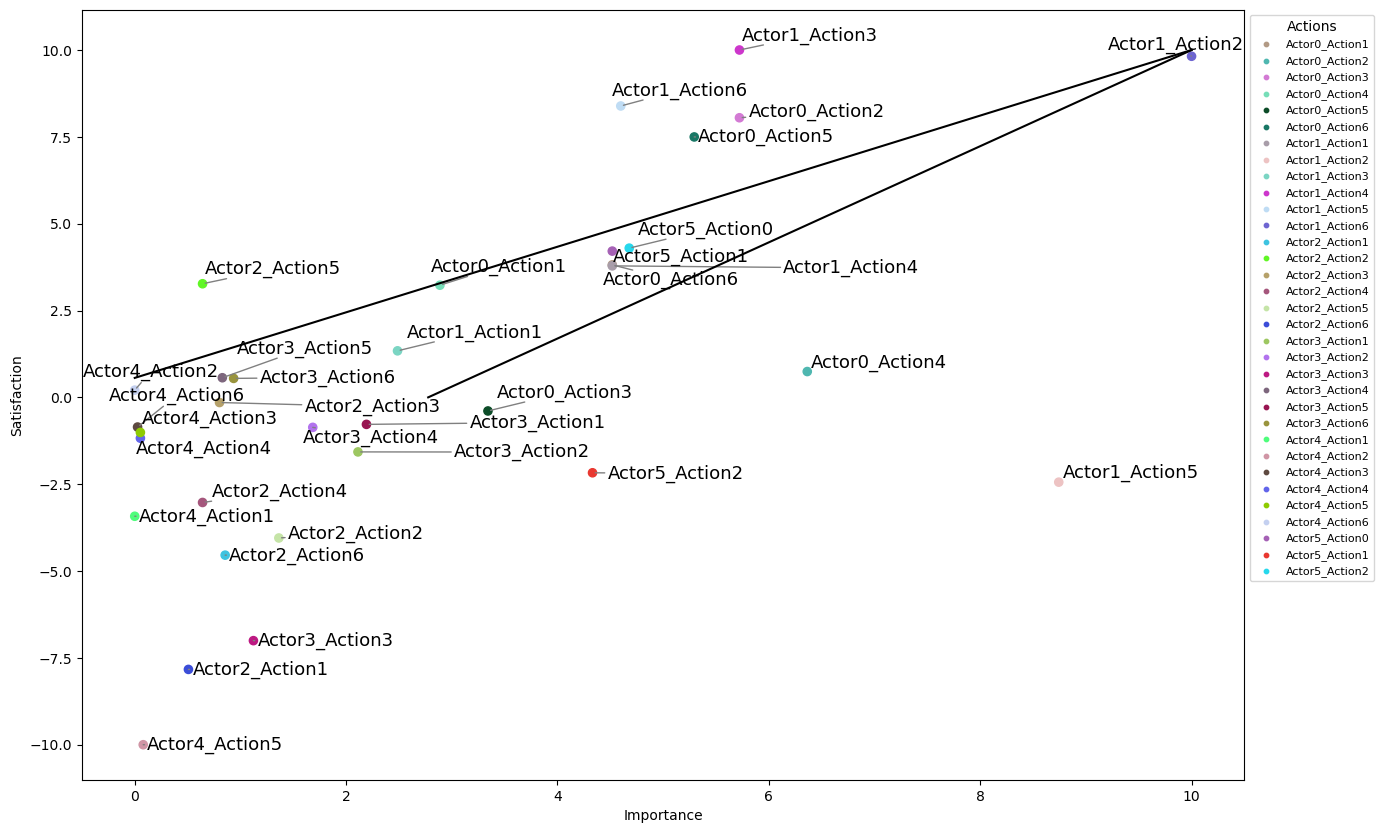

In [74]:
plt.figure(figsize = (15, 10)) # inch
plt.scatter(importance, satisfaction, s = 35, c = color) # s : 점의 사이즈 / c : 색상

# 라벨 이름
plt.xlabel("Importance")
plt.ylabel("Satisfaction")

# 중요도 기준선
xdata = [importance.mean(), 10]
ydata = [0, 10]
plt.plot(xdata, ydata, 'k')

# 만족도 기준선
xdata = [0, 10]
ydata = [satisfaction.mean(), 10]
plt.plot(xdata, ydata, 'k')

# 점에 이름 붙이기 + 위치 조정
texts = []
for i, action in enumerate(actions) :
    texts.append(plt.text(importance[i], satisfaction[i], action, fontsize = 13))

# 위치 조정
adjust_text(texts,
            arrowprops = dict(arrowstyle = '-', color = 'grey', lw = 1)) # lw : 선의 두께

# 색상 범례 추가
for i, action in enumerate(actions):
    plt.scatter([], [], c=[color[i]], label=action, s=10)
 
plt.legend(title = 'Actions', fontsize=8, title_fontsize='10', loc='upper left', bbox_to_anchor=(1,1))

plt.show()